## Demo notebook for accessing FIA data on Azure

This notebook provides an example of accessing USFS Forest Inventory and Analysis (FIA) data from blob storage on Azure. The data is stored in a collection of Parquet datasets.

FIA data are stored in the West Europe Azure region, so this notebook will run most efficiently on Azure compute located in West Europe. We recommend that substantial computation depending on FIA data also be situated in West Europe. If you are using FIA data for environmental science applications, consider applying for an [AI for Earth grant](http://aka.ms/ai4egrants) to support your compute requirements.

### Imports and constants

In [1]:
import dask.dataframe as dd
from adlfs import AzureBlobFileSystem

storage_account_name = 'cpdataeuwest'
folder_name = 'cpdata/raw/fia'

### Listing the data files

The full set of FIA data tables are available (e.g. tree, plot, condition).

We can use `adlfs` to list the files:

In [2]:
fs = AzureBlobFileSystem(account_name=storage_account_name)
parquet_files = fs.glob(folder_name + '/*parquet')
print('Found {} Parquet files'.format(len(parquet_files)))
for k in range(0,10):
    print(parquet_files[k])
print('...')

Found 60 Parquet files
cpdata/raw/fia/boundary.parquet
cpdata/raw/fia/cond.parquet
cpdata/raw/fia/cond_dwm_calc.parquet
cpdata/raw/fia/county.parquet
cpdata/raw/fia/dwm_coarse_woody_debris.parquet
cpdata/raw/fia/dwm_duff_litter_fuel.parquet
cpdata/raw/fia/dwm_fine_woody_debris.parquet
cpdata/raw/fia/dwm_microplot_fuel.parquet
cpdata/raw/fia/dwm_residual_pile.parquet
cpdata/raw/fia/dwm_transect_segment.parquet
...


### Opening one data file

Here we demonstrate how to open the `condition` dataset:

In [3]:
df = dd.read_parquet('az://' + folder_name + '/cond.parquet',
                     storage_options={'account_name':storage_account_name}).compute()
df.head()

,CN,PLT_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,CONDID,COND_STATUS_CD,COND_NONSAMPLE_REASN_CD,...,TRTOPCD,TRTYR1_P2A,TRTYR2_P2A,TRTYR3_P2A,LAND_COVER_CLASS_CD,SIEQN_REF_CD,SICOND_FVS,SIBASE_FVS,SISP_FVS,SIEQN_REF_CD_FVS
0,257087026010854,236617010010854,2011,1,1,3,215,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,258624640010854,236617012010854,2011,1,1,3,42,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,256996505010854,236617014010854,2011,1,6,89,83,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,621.0,LITU07
3,256996506010854,236617014010854,2011,1,6,89,83,2,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,256996507010854,236617014010854,2011,1,6,89,83,3,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103.0,50.0,621.0,LITU07


### Plot data

Here we make a quick plot comparing the stand age to the alive basal area.

(0.0, 100.0)

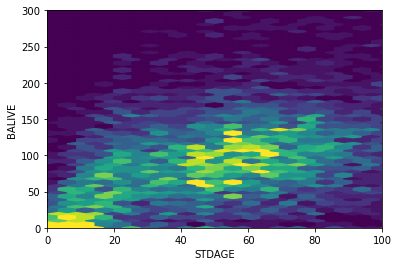

In [4]:
ax = df[::100].plot.hexbin('STDAGE', 'BALIVE', gridsize=(300, 100),
                           vmax=20, cmap='viridis', colorbar=False)
ax.set_ylim(0, 300)
ax.set_xlim(0, 100)